In [1]:
import numpy as np
import pandas as pd
import seaborn as snp

OPERATIONS PERFORMED

1) REMOVING REDUNDANT COLUMNS
2) REMOVING DUPLICATES
3) REMOVING NAN VALUES
4) RENAME THE COLUMNS
5) ALTERING INDVIDUAL COLUMNS
6) FINDING THE OUTLIER DETECTIONS

In [2]:
dt = pd.read_csv('titanic.csv')

In [3]:
dt[0:13]

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0
5,1083,3,"Olsen, Mr. Henry Margido",male,28.0,0,0,C 4001,22.5250,NaN,S,NaN,173.0,NaN,0
6,898,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S,NaN,NaN,NaN,0
7,560,2,"Sinkkonen, Miss. Anna",female,30.0,0,0,250648,13.0000,NaN,S,10,NaN,"Finland / Washington, DC",1
8,1079,3,"Ohman, Miss. Velin",female,22.0,0,0,347085,7.7750,NaN,S,C,NaN,NaN,1
9,908,3,"Jussila, Miss. Mari Aina",female,21.0,1,0,4137,9.8250,NaN,S,NaN,NaN,NaN,0


#dropping the redundant columns which is not require

In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


In [6]:
dt.columns

Index(['passenger_id', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest',
       'survived'],
      dtype='object')

In [7]:
#differentiating the columns first which one i want to keep and and i want to drop
columns_to_keep = ['passenger_id', 'pclass', 'name', 'sex', 'age','sibsp', 'parch','ticket', 'fare', 'embarked','survived']

columns_to_drop = ['cabin','boat', 'body', 'home.dest']

In [8]:
len(columns_to_keep)

11

In [9]:
len(columns_to_drop)

4

In [ ]:
dt.shape  #850 rows and 15 columns

(850, 15)

In [12]:
#dropping the columns which is not required

dt.drop(columns_to_drop,axis=1,inplace=True)


In [ ]:
dt.shape  #now columns are reduced to 11 

(850, 11)

In [15]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   embarked      849 non-null    object 
 10  survived      850 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 73.2+ KB


Removing the duplicates values

In [ ]:
dt.duplicated().sum()  #hence there are duplicates

np.int64(0)

In [ ]:
dt.duplicated().value_counts()  #hence there are no duplicates

False    850
Name: count, dtype: int64

REMOVING THE NULL VALUES

In [ ]:
dt.isnull().sum()  #only the age has more null values

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
embarked          1
survived          0
dtype: int64

In [ ]:
#hence removing all the null values only from age

dt.dropna(subset=['age'], inplace=True) 


In [29]:
dt.isnull().sum() 

passenger_id    0
pclass          0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            1
embarked        1
survived        0
dtype: int64

In [30]:
#also other way to do it and that is dropping directly

dt.dropna(inplace=True)

In [31]:
dt.isnull().sum() 

passenger_id    0
pclass          0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
embarked        0
survived        0
dtype: int64

NOW REBNAMING THE COLUMNS

In [32]:
dt.columns

Index(['passenger_id', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'embarked', 'survived'],
      dtype='object')

In [36]:
#converting first letter of each column into capital

dt.columns[3].title()

'Sex'

In [40]:
lst=[]
for columns in dt.columns:
    lst.append(columns.title())

print(lst)



['Passenger_Id', 'Pclass', 'Name', 'Sex', 'Age', 'Sibsp', 'Parch', 'Ticket', 'Fare', 'Embarked', 'Survived']


In [ ]:
dt.columns  #still the columns arent changed

Index(['passenger_id', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'embarked', 'survived'],
      dtype='object')

In [ ]:
#now assigning the lst to the orginal dataset

dt.columns=lst

In [ ]:
dt.columns  #hence all the columns are renamed

Index(['Passenger_Id', 'Pclass', 'Name', 'Sex', 'Age', 'Sibsp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Survived'],
      dtype='object')

In [49]:
#resetting the index

dt.reset_index(inplace=True)

In [54]:
dt.drop('index',axis=1,inplace=True)

In [59]:
dt[11:27]

,Passenger_Id,Pclass,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Embarked,Survived
11,233,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C,1
12,446,2,"Hocking, Miss. Ellen ""Nellie""",female,20.0,2,1,29105,23.0000,S,1
13,602,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.2500,S,0
14,884,3,"Jensen, Mr. Niels Peder",male,48.0,0,0,350047,7.8542,S,0
15,497,2,"Maybery, Mr. Frank Hubert",male,40.0,0,0,239059,16.0000,S,0
16,36,1,"Bowerman, Miss. Elsie Edith",female,22.0,0,1,113505,55.0000,S,1
17,1088,3,"Olsson, Mr. Oscar Wilhelm",male,32.0,0,0,347079,7.7750,S,1
18,978,3,"Lulic, Mr. Nikola",male,27.0,0,0,315098,8.6625,S,1
19,438,2,"Herman, Miss. Kate",female,24.0,1,2,220845,65.0000,S,1
20,766,3,"Delalic, Mr. Redjo",male,25.0,0,0,349250,7.8958,S,0


CLEANING INDVIDUAL COLUMNS

In [ ]:
dt.loc[4,'Ticket']   #reducing the extra spaces in Ticket column

'C 4001'

In [ ]:
dt['Ticket'].str.replace(' ','')

0                 315089
1                 345773
2                  29105
3                  28221
4                  C4001
             ...        
669                  680
670                11771
671               244367
672    SOTON/O.Q.3101315
673               250647
Name: Ticket, Length: 674, dtype: object

In [62]:
#assigning to the orginal data

dt['Ticket']=dt['Ticket'].str.replace(' ','')


In [67]:
dt.loc[4,'Ticket']

'C4001'

In [68]:
dt

,Passenger_Id,Pclass,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Embarked,Survived
0,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,S,0
1,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,S,0
2,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,S,1
3,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,S,0
4,1083,3,"Olsen, Mr. Henry Margido",male,28.0,0,0,C4001,22.5250,S,0
...,...,...,...,...,...,...,...,...,...,...,...
669,158,1,"Hipkins, Mr. William Edward",male,55.0,0,0,680,50.0000,S,0
670,174,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.7000,C,0
671,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,S,1
672,1112,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q.3101315,13.7750,S,0


In [70]:
#now changing the 1 and 0 into yes or no of SURVIVED COLUMN
type(dt.loc[2,'Survived'])

numpy.int64

In [ ]:
#NOW IN SURVIVED COLUMN INSTEAD OF 1 0R 0 YES AND NO WILL BE PRESENT
dt['Survived']= dt['Survived'].replace({1:'Yes', 0:'No'})

In [73]:
dt.loc[3,'Survived']

'No'

Finding the outlier detection for the columns

In [77]:
dt[0:27]

,Passenger_Id,Pclass,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Embarked,Survived
0,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,S,No
1,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,S,No
2,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,S,Yes
3,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,S,No
4,1083,3,"Olsen, Mr. Henry Margido",male,28.0,0,0,C4001,22.5250,S,No
5,898,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,S,No
6,560,2,"Sinkkonen, Miss. Anna",female,30.0,0,0,250648,13.0000,S,Yes
7,1079,3,"Ohman, Miss. Velin",female,22.0,0,0,347085,7.7750,S,Yes
8,908,3,"Jussila, Miss. Mari Aina",female,21.0,1,0,4137,9.8250,S,No
9,313,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C,No


<Axes: ylabel='Age'>

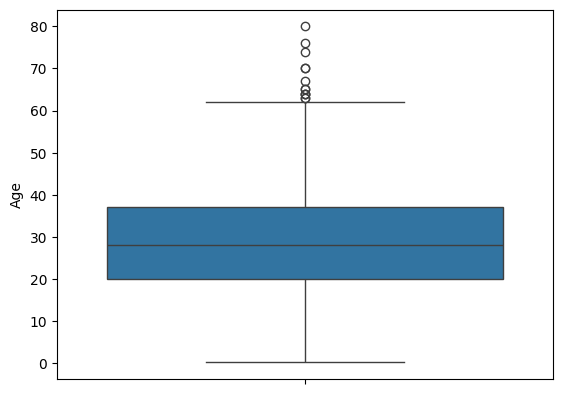

In [80]:
#age
snp.boxplot(dt['Age'])

In [81]:
#as from boxplot Age 
q1 = dt['Age'].quantile(0.25)
q3 = dt['Age'].quantile(0.75)

IQR = q3-q1


In [ ]:
lower_limit = q1-1.5*IQR
upper_limit = q3+1.5*IQR

dt = dt[(dt['Age']>=lower_limit) & (dt['Age']<=upper_limit)]

<Axes: ylabel='Age'>

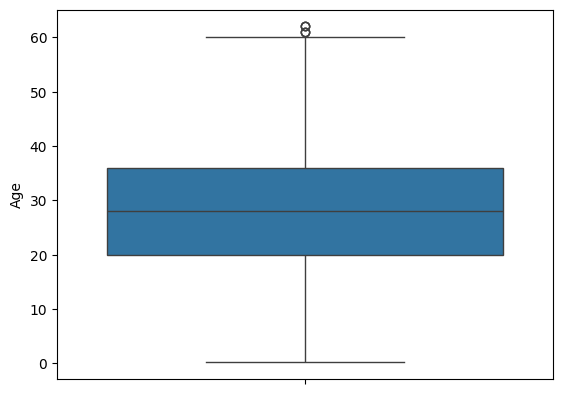

In [ ]:
snp.boxplot(dt['Age'])

In [ ]:
#finding the people who has age  more than 60
dt[dt['Age']>60]

,Passenger_Id,Pclass,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Embarked,Survived
147,1068,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,S,No
176,300,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,S,No
234,321,1,"Wright, Mr. George",male,62.0,0,0,113807,26.5500,S,No
277,511,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,No
395,279,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,S,No
658,487,2,"Lingane, Mr. John",male,61.0,0,0,235509,12.3500,Q,No


In [89]:
dt.drop(dt[dt['Age']>60].index,inplace=True)

C:\Users\YASEEN\AppData\Local\Temp\ipykernel_4512\3304160363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt.drop(dt[dt['Age']>60].index,inplace=True)


<Axes: ylabel='Age'>

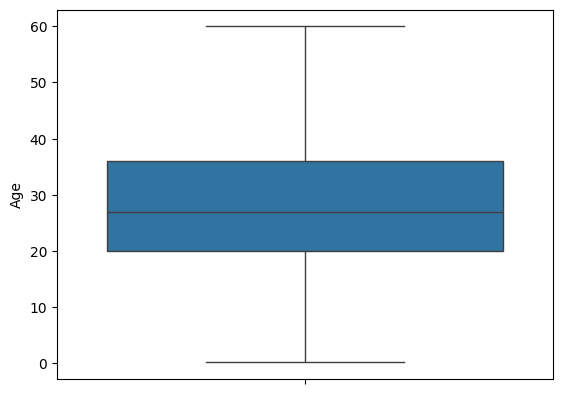

In [ ]:
snp.boxplot(dt['Age'])  #hence All the outliers are removed

changing the datatype of AGE  from Float to int

In [127]:
dt['Age']= dt['Age'].astype(int)

C:\Users\YASEEN\AppData\Local\Temp\ipykernel_4512\3853125457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['Age']= dt['Age'].astype(int)


In [128]:
dt[100:150]

,Passenger_Id,Pclass,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Embarked,Survived
100,558,2,"Silven, Miss. Lyyli Karoliina",female,18,0,2,250652,13.0000,S,Yes
101,1130,3,"Pettersson, Miss. Ellen Natalia",female,18,0,0,347087,7.7750,S,No
102,309,1,"Wick, Miss. Mary Natalie",female,31,0,2,36928,164.8667,S,Yes
103,202,1,"McGough, Mr. James Robert",male,36,0,0,PC17473,26.2875,S,Yes
104,827,3,"Goodwin, Master. William Frederick",male,11,5,2,CA2144,46.9000,S,No
105,186,1,"Lindstrom, Mrs. Carl Johan (Sigrid Posse)",female,55,0,0,112377,27.7208,C,Yes
106,960,3,"Lemberopolous, Mr. Peter L",male,34,0,0,2683,6.4375,C,No
107,408,2,"Fillbrook, Mr. Joseph Charles",male,18,0,0,C.A.15185,10.5000,S,No
108,546,2,"Reynaldo, Ms. Encarnacion",female,28,0,0,230434,13.0000,S,Yes
109,356,2,"Butler, Mr. Reginald Fenton",male,25,0,0,234686,13.0000,S,No


In [129]:
#storing into excel file

dt.to_excel('Clean_titanic_data.xlsx')